In [123]:
'''
This is an effort to sampler points from a securtiy ring depending on:
q    : should be grand       
alpha: should be small       ~1.15
'''

def ring(q, alpha):
    return q/alpha^2, alpha^2*q

def is_in_ring(x, y, ring):
    norm = x^2+y^2
    if norm > ring[0] and norm < ring[1]:
        return True
    else:
        return False

In [124]:
q = 10000; alpha = 1.15
a, b = ring(q, alpha)
#T_r2 = RealDistribution('uniform', [a, b])
T_r = RealDistribution('uniform', [sqrt(a), sqrt(b)])
T = RealDistribution('uniform', [0,1])
T_theta = RealDistribution('uniform', [0, 2*pi])

In [125]:
ring(q, alpha)

(7561.43667296786, 13225.0000000000)

In [126]:
#r = sqrt(T_r2.get_random_element())
r = T_r.get_random_element()
#t = T.get_random_element()
#x = r*t
#y = r*sqrt(1-t^2)
theta = T_theta.get_random_element()
x = r*cos(theta)
y = r*sin(theta)

In [127]:
is_in_ring(x,y, [a,b])

True

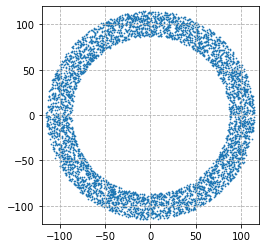

In [128]:
import numpy as np
import matplotlib.pyplot as plt

N = 5000
#r = [sqrt(T_r2.get_random_element()) for _ in range(N)]
#t = [(T.get_random_element() for _ in range(N)]
#x = [r[i]*t[i] for i in range(N)]
#y = [r[i]*sqrt(1-t[i]^2) for i in range(N)]
r = [T_r.get_random_element() for _ in range(N)]
theta = [T_theta.get_random_element() for _ in range(N)]
x = [r[i]*cos(theta[i]) for i in range(N)]
y = [r[i]*sin(theta[i]) for i in range(N)]

fig, ax = plt.subplots()


plt.scatter(x, y, s=.5)
plt.xlim(-120,120)
plt.ylim(-120,120)

circle1 = plt.Circle((0, 0), sqrt(a), fill=False)
circle2 = plt.Circle((0, 0), sqrt(b), fill=False)

plt.grid(linestyle='--')

ax.set_aspect(1)

#ax.add_artist(circle1)
#ax.add_artist(circle2)

plt.savefig('uniform.png')
plt.show()